# problem Definition

Classification of people who are alive or dead from the Titanic disaster

# Data Collection

In [1]:
import pandas as pd

df = pd.read_csv('titanic_ds.csv')
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [2]:
df = df.drop(columns=df.columns[df.columns.str.contains('zero|Passengerid')])

In [3]:
df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked',
       'survived'],
      dtype='object')

In [4]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Pclass    1309 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   survived  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


# Data preparation

## 1.Expolratory Data Analysis - EDA

In [6]:
df.describe()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


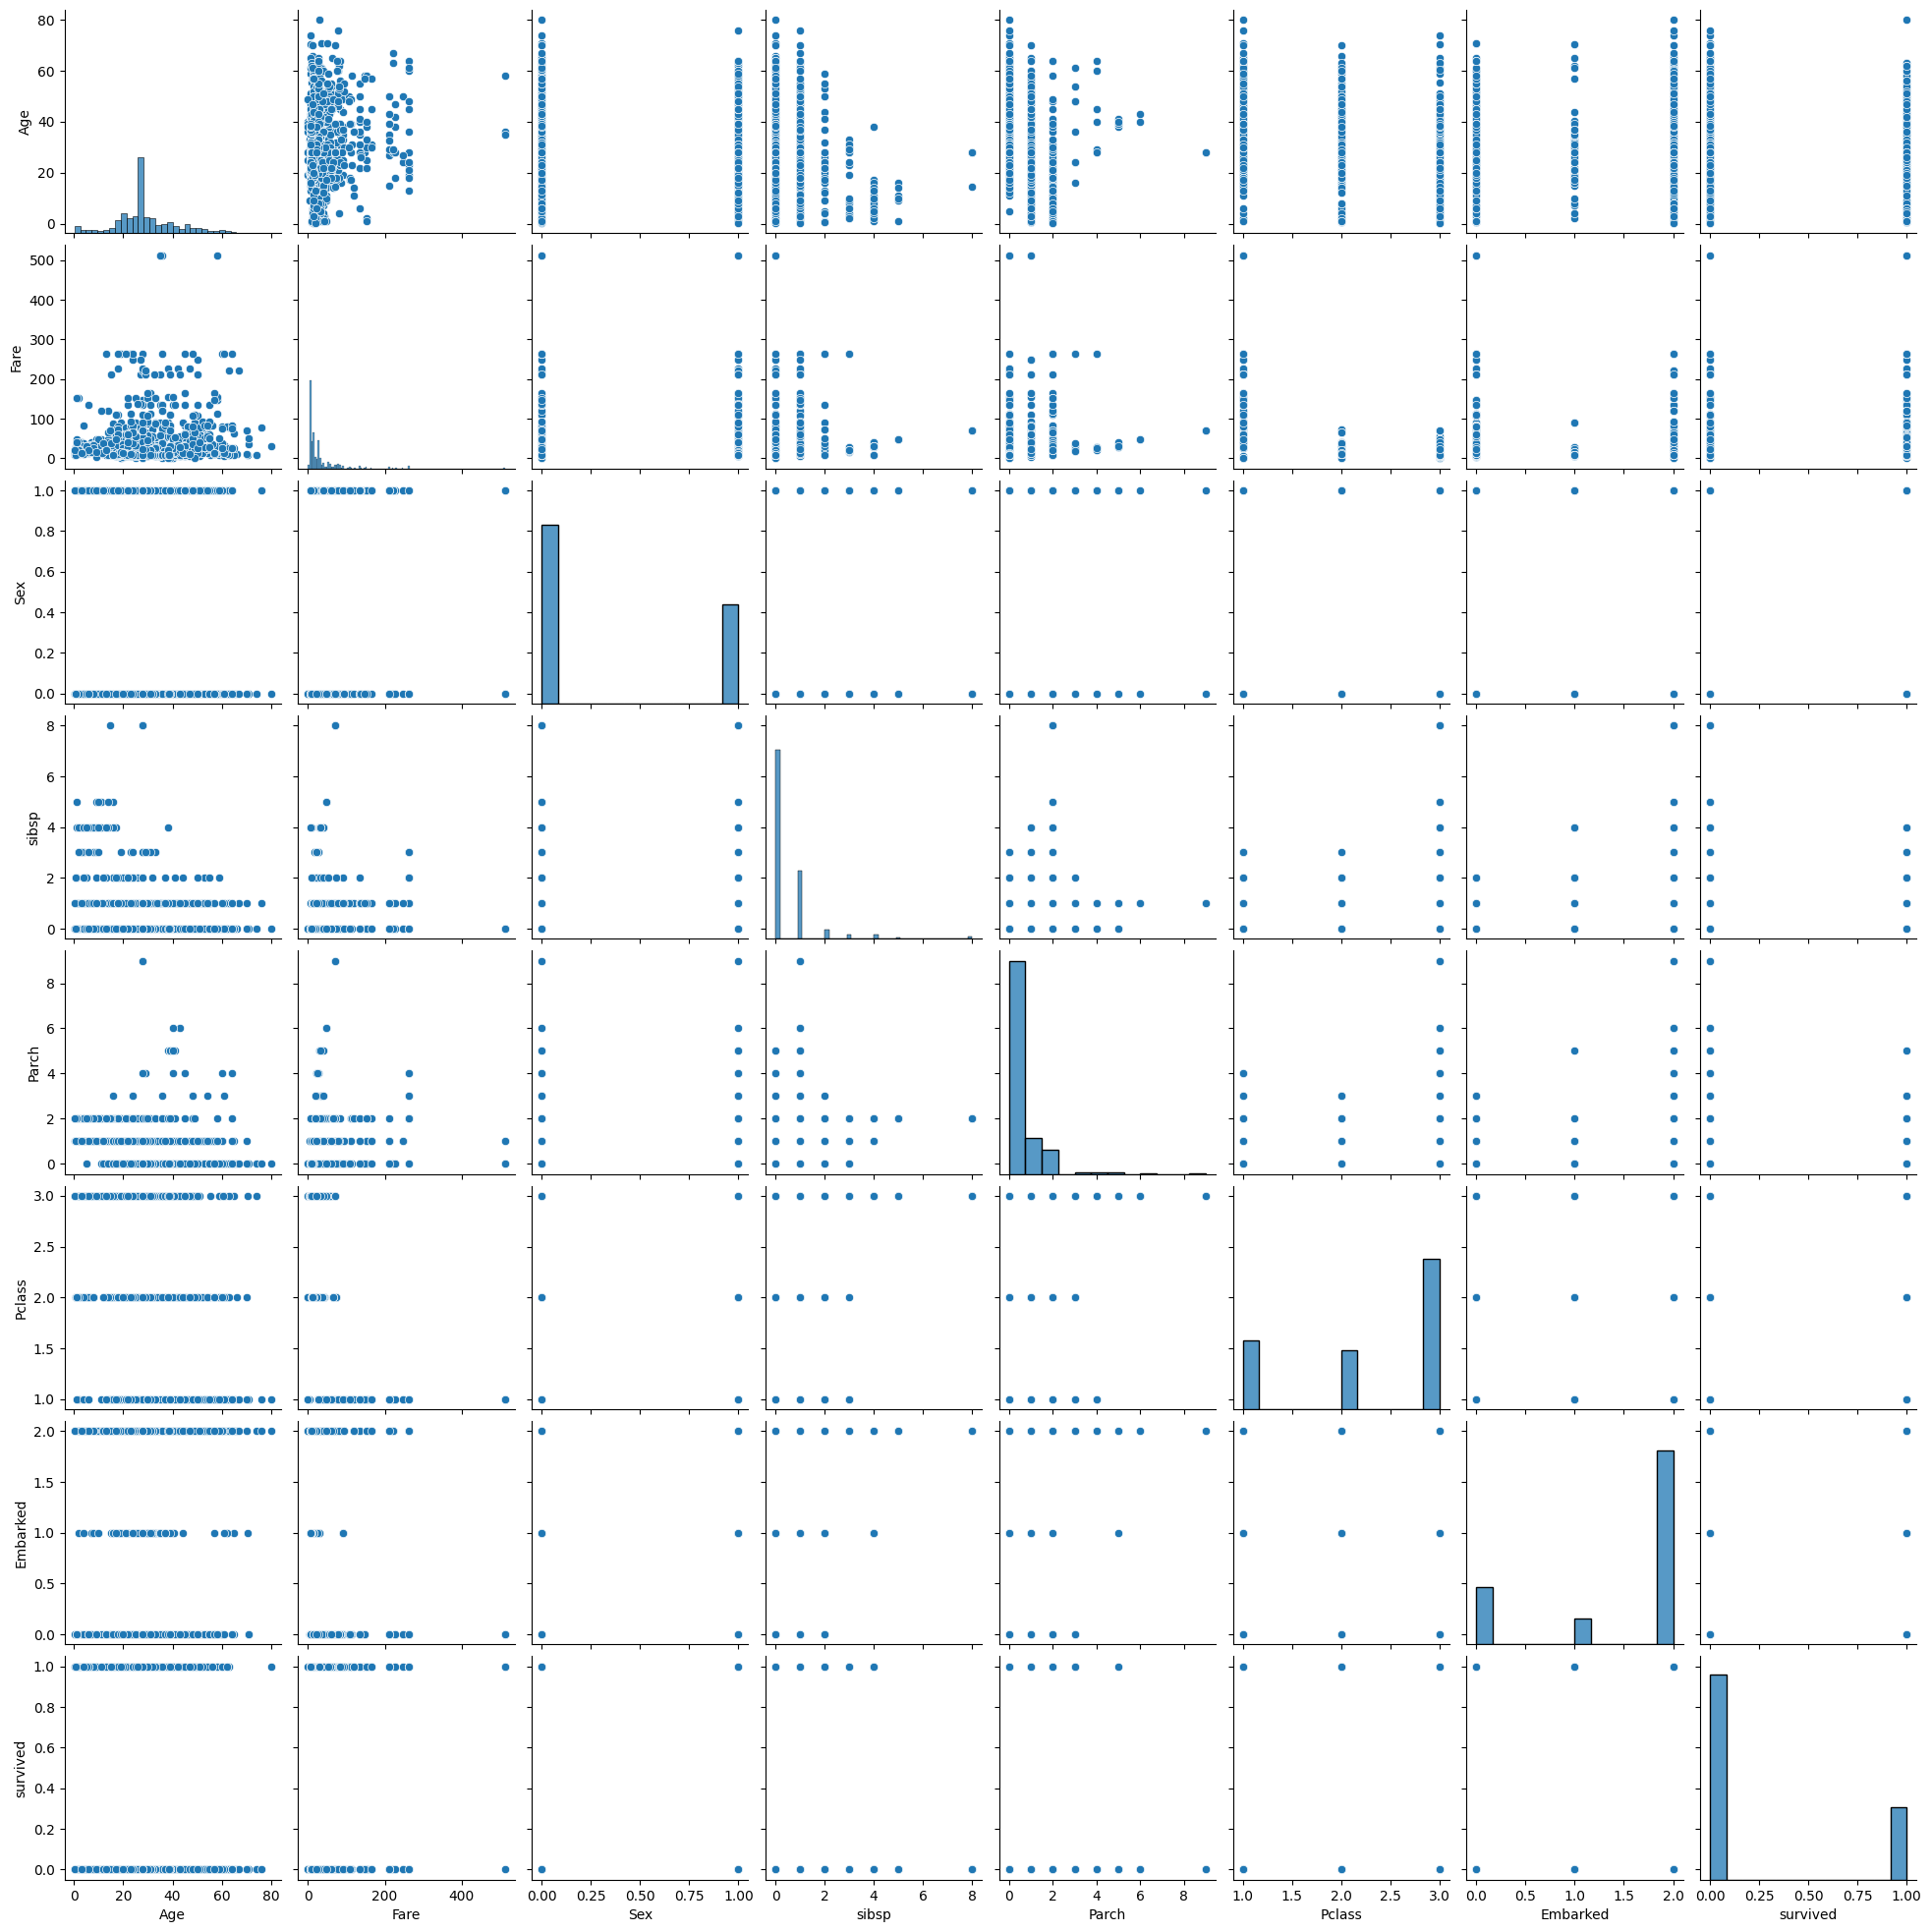

In [7]:
import seaborn as sns
sns.pairplot(df)

In [8]:
df.isna().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    2
survived    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(209)

In [10]:
df.drop(df.columns[df.isna().sum()/len(df) >= 0.9] , axis = 1)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [11]:
from math import ceil
df = df.dropna(thresh= ceil(0.9 * len(df.columns)))
dropped_rows = df[~df.index.isin(df.index)]
print(dropped_rows)

Empty DataFrame
Columns: [Age, Fare, Sex, sibsp, Parch, Pclass, Embarked, survived]
Index: []


In [12]:
df = df.drop_duplicates(keep='first')
dropped_row = df[~df.index.isin(df.index)]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1098 non-null   float64
 1   Fare      1098 non-null   float64
 2   Sex       1098 non-null   int64  
 3   sibsp     1098 non-null   int64  
 4   Parch     1098 non-null   int64  
 5   Pclass    1098 non-null   int64  
 6   Embarked  1098 non-null   float64
 7   survived  1098 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 77.2 KB


In [14]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)

# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(Q1)
# print(Q3)
# print(IQR)
# print(df)

## 2.Prepare Data


In [15]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='survived')
y = df['survived']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
print(x_train.shape) 
print(y_train.shape)  
print(x_test.shape)  
print(y_test.shape)  

(878, 7)
(878,)
(220, 7)
(220,)


# Training Model

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

<div>
  <details>
    <summary style="color:yellow">Hint</summary>
    <table style="width:100%; border: 1px solid white; border-collapse: collapse; text-align: center;">
      <thead>
        <tr>
          <th style="border: 1px solid white; padding: 8px; text-align: center;"><strong>ویژگی/پارامتر</strong></th>
          <th style="border: 1px solid white; padding: 8px; text-align: center;"><strong>StandardScaler</strong></th>
          <th style="border: 1px solid white; padding: 8px; text-align: center;"><strong>MinMaxScaler</strong></th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td style="border: 1px solid white; padding: 8px;"><strong>عملکرد</strong></td>
          <td style="border: 1px solid white; padding: 8px;">مقیاس‌بندی داده‌ها به طوری که میانگین صفر و انحراف معیار یک داشته باشند.</td>
          <td style="border: 1px solid white; padding: 8px;">مقیاس‌بندی داده‌ها به بازه مشخص (معمولاً بین 0 و 1).</td>
        </tr>
        <tr>
          <td style="border: 1px solid white; padding: 8px;"><strong>کاربردها</strong></td>
          <td style="border: 1px solid white; padding: 8px;">مدل‌هایی که به توزیع داده‌ها حساس‌اند مانند SVM، رگرسیون خطی، و PCA.</td>
          <td style="border: 1px solid white; padding: 8px;">مدل‌هایی که به مقیاس داده‌ها در بازه خاص نیاز دارند مانند شبکه‌های عصبی.</td>
        </tr>
        <tr>
          <td style="border: 1px solid white; padding: 8px;"><strong>مزایا</strong></td>
          <td style="border: 1px solid white; padding: 8px;">- حفظ اطلاعات توزیع داده‌ها<br>- مفید برای مدل‌هایی که حساس به توزیع داده‌ها هستند.</td>
          <td style="border: 1px solid white; padding: 8px;">- مقیاس‌بندی داده‌ها به محدوده مشخص<br>- مناسب برای مدل‌های نیازمند بازه‌های ثابت مانند شبکه‌های عصبی.</td>
        </tr>
        <tr>
          <td style="border: 1px solid white; padding: 8px;"><strong>معایب</strong></td>
          <td style="border: 1px solid white; padding: 8px;">- ممکن است ویژگی‌ها با مقیاس‌های بسیار متفاوت پیچیده‌تر شوند.</td>
          <td style="border: 1px solid white; padding: 8px;">- برای داده‌هایی که نیاز به توزیع خاص دارند، ممکن است نتایج خوبی ندهد.</td>
        </tr>
        <tr>
          <td style="border: 1px solid white; padding: 8px;"><strong>مثال</strong></td>
          <td style="border: 1px solid white; padding: 8px;">SVM، رگرسیون خطی، درخت تصمیم</td>
          <td style="border: 1px solid white; padding: 8px;">شبکه‌های عصبی، درخت‌های تصمیم خاص، الگوریتم‌های نیازمند داده‌های نرمال‌شده.</td>
        </tr>
      </tbody>
    </table>
  </details>
</div>


In [17]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [18]:
y_pred = pipeline.predict(x_test)

In [22]:
from sklearn.metrics import classification_report
class_names = ['alive', 'dead']
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)


              precision    recall  f1-score   support

       alive       0.81      0.91      0.86       153
        dead       0.71      0.51      0.59        67

    accuracy                           0.79       220
   macro avg       0.76      0.71      0.72       220
weighted avg       0.78      0.79      0.77       220



In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7863636363636364

<div>
  <details>
    <summary style="color:darkgreen">Hint</summary>
    <p style="font-family:'Sahel Regular'; text-align:right;" dir="rtl"><strong>Accuracy:</strong> زمانی استفاده می‌شود که هر دو کلاس اهمیت یکسانی داشته باشند و داده‌های شما متعادل باشند (یعنی تعداد نمونه‌های کلاس‌های مثبت و منفی تقریباً برابر باشد). برای مثال، در تشخیص بیماری‌هایی که شیوع بالایی ندارند، Accuracy ممکن است معیار خوبی نباشد، چون مدل ممکن است با نادیده گرفتن کلاس مثبت و فقط پیش‌بینی کلاس منفی به Accuracy بالا برسد.</p>
    <p style="font-family:'Sahel Regular'; text-align:right;" dir="rtl"><strong>Precision:</strong> اگر هدف شما کاهش پیش‌بینی‌های مثبت نادرست باشد (یعنی مدل تا جای ممکن خطای نوع اول نداشته باشد)، باید از precision استفاده کنید. این معیار مناسب برای مسائلی است که در آن هزینه‌ی پیش‌بینی مثبت اشتباه بالاست. برای مثال، در سیستم‌های تشخیص کلاهبرداری بانکی، اگر مدلی تراکنش قانونی را کلاهبرداری شناسایی کند (پیش‌بینی مثبت اشتباه)، ممکن است به اعتماد کاربران صدمه بزند.</p>
    <p style="font-family:'Sahel Regular'; text-align:right;" dir="rtl"><strong>Recall:</strong> اگر هدف شما کاهش پیش‌بینی‌های منفی اشتباه (یعنی خطای نوع دوم) باشد، باید از recall استفاده کنید. این معیار مناسب مسائلی است که نادیده گرفتن کلاس مثبت خطر بیشتری دارد. برای مثال، در تشخیص بیماری‌های خطرناک، یک منفی اشتباه ممکن است باعث از دست رفتن فرصت درمان شود.</p>
    <p style="font-family:'Sahel Regular'; text-align:right;" dir="rtl">در نهایت، <strong>F1 Score</strong> نیز یک معیار ترکیبی از precision و recall است که در مواقعی که توازن بین این دو مهم است، مفید واقع می‌شود، به خصوص وقتی داده‌ها نامتعادل هستند و شما به یک معیار کلی برای مقایسه مدل‌ها نیاز دارید.</p>
  </details>
</div>
